In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def prepare_data(df, forecast_col, forecast_out, test_size):
    label = df[forecast_col].shift(-forecast_out)  # #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]])  # #creating the feature array
    X = preprocessing.scale(X)  # #processing the feature array
    X_lately = X[-forecast_out:]  # #creating the column i want to use later in the predicting method
    X = X[:-forecast_out]  #  X that will contain the training and testing
    label.dropna(inplace = True) #dropping na values
    y = np.array(label) # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=42) #cross validation

    response = [X_train, X_test, Y_train, Y_test, X_lately]
    return response


In [3]:
df= pd.read_csv("prices.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-04,155.606506,161.199997,150.608002,157.639496,157.639496,253456000
1,2022-02-07,158.520004,162.690994,157.250000,157.935501,157.935501,102624000
2,2022-02-08,156.750504,161.792496,155.550507,161.413498,161.413498,76040000
3,2022-02-09,162.873505,163.834503,160.250000,161.189499,161.189499,68786000
4,2022-02-10,158.350006,160.716507,157.750000,159.003494,159.003494,68268000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
#df = df[df.symbol == "AMZN"]

In [6]:
forecast_col = 'Close'
forecast_out = 7
test_size = 0.2

In [7]:
X_train, X_test, Y_train, Y_test, X_lately = prepare_data(df,forecast_col, forecast_out, test_size)
learner = LinearRegression()
learner.fit(X_train, Y_train)


LinearRegression()

In [8]:
score= learner.score(X_test, Y_test) #testing the linear regression model
forecast = learner.predict(X_lately)  #set that will contain the forecasted data
response = {}  #creting json object
response['test_score']= score
response['forecast_set'] = forecast

print(response)


{'test_score': 0.7946357962920226, 'forecast_set': array([100.24502161, 102.81498062, 101.37682758, 103.57235255,
       105.29133772, 111.89494927, 103.79360922])}


Tesla Stock Price Prediction with Machine Learning

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prophet

In [30]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-04,363.126678,383.303345,357.510010,381.816681,381.816681,82035900
1,2022-04-05,378.766663,384.290009,362.433319,363.753326,363.753326,80075100
2,2022-04-06,357.823334,359.666656,342.566681,348.586670,348.586670,89348400
3,2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200
4,2022-04-08,347.736664,349.480011,340.813324,341.829987,341.829987,55013700


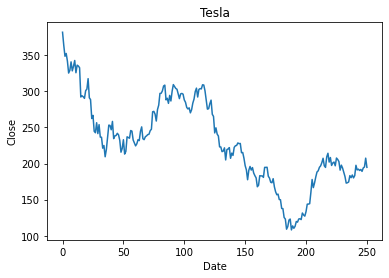

In [31]:
close = df["Close"]
ax = close.plot(title = "Tesla")
ax.set_xlabel("Date")
ax.set_ylabel("Close")
plt.show()

In [32]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df = df[["Date", "Close"]]
df.head()

,Date,Close
0,2022-04-04,381.816681
1,2022-04-05,363.753326
2,2022-04-06,348.586670
3,2022-04-07,352.420013
4,2022-04-08,341.829987


In [37]:
data = df.rename(columns={"Date" : "ds", "Close" : "y"})



In [42]:
model = prophet()
model

TypeError: 'module' object is not callable

In [39]:
model.fit(data)

NameError: name 'model' is not defined

In [40]:

predict = model. make_future_dataframe(periods = 365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

NameError: name 'model' is not defined

In [43]:
grapph = model.plot(forecast, xlabel = "Date", ylabel = "Price")

NameError: name 'model' is not defined